In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Load data
df = pd.read_csv('kelulusan_mahasiswa.csv')

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicates: {df.duplicated().sum()}")

# Check data types and basic info
print("\nData info:")
print(df.info())

Missing values:
IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64

Duplicates: 0

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None


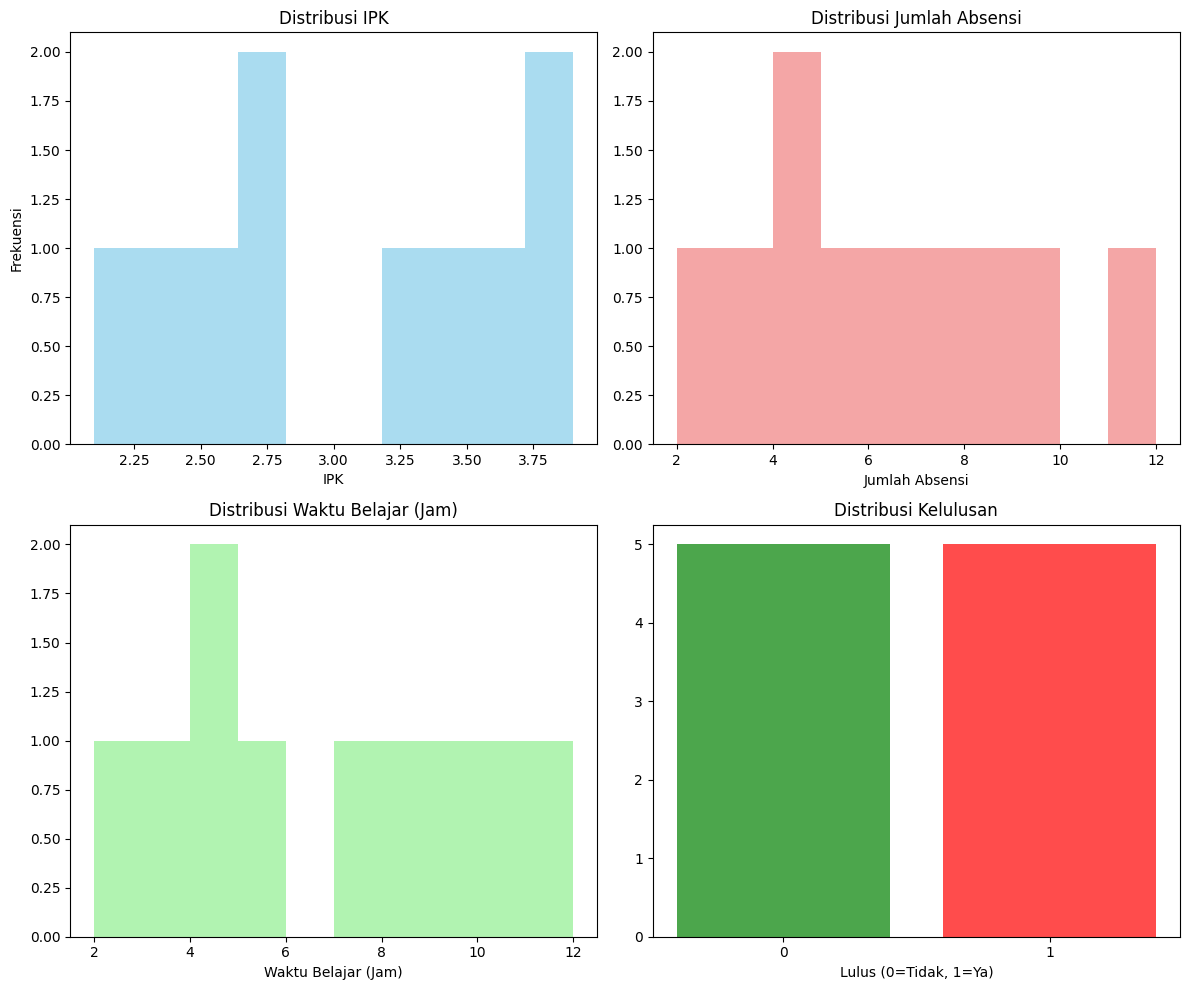

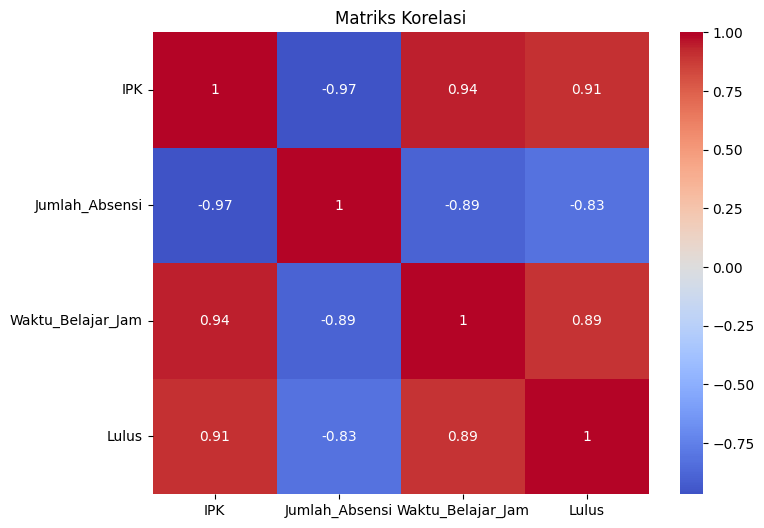

Korelasi dengan target (Lulus):
Lulus                1.000000
IPK                  0.906525
Waktu_Belajar_Jam    0.892607
Jumlah_Absensi      -0.828079
Name: Lulus, dtype: float64


In [3]:
# Distribusi variabel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribusi IPK
axes[0,0].hist(df['IPK'], bins=10, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribusi IPK')
axes[0,0].set_xlabel('IPK')
axes[0,0].set_ylabel('Frekuensi')

# Distribusi Absensi
axes[0,1].hist(df['Jumlah_Absensi'], bins=10, alpha=0.7, color='lightcoral')
axes[0,1].set_title('Distribusi Jumlah Absensi')
axes[0,1].set_xlabel('Jumlah Absensi')

# Distribusi Waktu Belajar
axes[1,0].hist(df['Waktu_Belajar_Jam'], bins=10, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Distribusi Waktu Belajar (Jam)')
axes[1,0].set_xlabel('Waktu Belajar (Jam)')

# Distribusi Kelulusan
lulus_counts = df['Lulus'].value_counts()
axes[1,1].bar(lulus_counts.index, lulus_counts.values, alpha=0.7, color=['red', 'green'])
axes[1,1].set_title('Distribusi Kelulusan')
axes[1,1].set_xlabel('Lulus (0=Tidak, 1=Ya)')
axes[1,1].set_xticks([0, 1])

plt.tight_layout()
plt.show()

# Matriks korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()

print("Korelasi dengan target (Lulus):")
print(correlation_matrix['Lulus'].sort_values(ascending=False))

In [4]:
# Fitur 1: Rasio_Efisiensi_Belajar = IPK / Waktu_Belajar_Jam
df['Rasio_Efisiensi_Belajar'] = df['IPK'] / df['Waktu_Belajar_Jam']

# Fitur 2: Skor_Performa_Komprehensif = IPK * (1 - Jumlah_Absensi/15)
# Asumsi: maksimal absensi yang wajar adalah 15
df['Skor_Performa_Komprehensif'] = df['IPK'] * (1 - df['Jumlah_Absensi']/15)

print("\nData setelah feature engineering:")
print(df.head())


Data setelah feature engineering:
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Efisiensi_Belajar  \
0  3.8               3                 10      1                 0.380000   
1  2.5               8                  5      0                 0.500000   
2  3.4               4                  7      1                 0.485714   
3  2.1              12                  2      0                 1.050000   
4  3.9               2                 12      1                 0.325000   

   Skor_Performa_Komprehensif  
0                    3.040000  
1                    1.166667  
2                    2.493333  
3                    0.420000  
4                    3.380000  


In [33]:
# Split data menjadi features (X) dan target (y)
X = df.drop('Lulus', axis=1)
y = df['Lulus']

# Tanpa stratify (lebih aman untuk dataset sangat kecil)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=1, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=2, random_state=42
)

print("🎯 FINAL SPLIT: 7/2/1")
print(f"Training:   {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples") 
print(f"Test:       {X_test.shape[0]} samples")

print("\n📊 Distribusi Kelas:")
print(f"Training   - Lulus: {y_train.sum()}, Tidak Lulus: {len(y_train) - y_train.sum()}")
print(f"Validation - Lulus: {y_val.sum()}, Tidak Lulus: {len(y_val) - y_val.sum()}")
print(f"Test       - Lulus: {y_test.sum()}, Tidak Lulus: {len(y_test) - y_test.sum()}")

🎯 FINAL SPLIT: 7/2/1
Training:   7 samples
Validation: 2 samples
Test:       1 samples

📊 Distribusi Kelas:
Training   - Lulus: 4, Tidak Lulus: 3
Validation - Lulus: 0, Tidak Lulus: 2
Test       - Lulus: 1, Tidak Lulus: 0
